<a href="https://colab.research.google.com/github/sam02/tp547/blob/main/codigos/codigos_aula13/serqpsk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matlab
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install random

  Preparing metadata (setup.py) ... done
  Created wheel for matlab: filename=matlab-0.1-py3-none-any.whl size=1156 sha256=f6c13138242ec11d4549a6aa696d9aa30f6d4697c74e43ffbeb5ba6b34844ebb
  Stored in directory: /root/.cache/pip/wheels/d1/d3/76/5314058ee22e7957a18eec0291788462f1df178bb08223bdd2
Successfully built matlab
ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


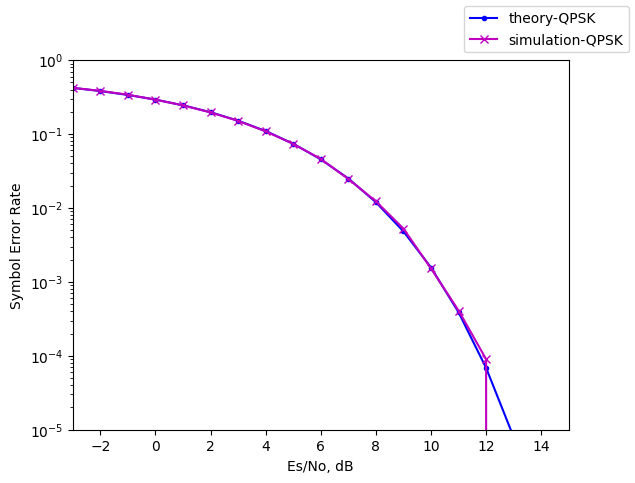

In [2]:
import matlab
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import random

N = 10**5 # number of symbols
Es_N0_dB = np.arange(-3,20,1) # multiple Eb/N0 values
ipHat = np.empty(N,dtype=complex)
simser=[]
for ii in (Es_N0_dB):
    ip = (2*(np.random.uniform(0,1,N)>0.5)-1) + 1j*(2*(np.random.uniform(0,1,N)>0.5)-1) #
    s = (1/np.sqrt(2))*ip # normalization of energy to 1
    n = 1/np.sqrt(2)*(np.random.normal(0,1,N)+np.random.normal(0,1,N)*1j) # white guassian noise, 0dB variance

    y = s + 10**(-ii/20)*n # additive white gaussian noise

    # demodulation
    y_re = np.real(y) # real
    y_im = np.imag(y) # imaginary
    for i in range(N):
        if np.logical_and(y_re[i] < 0 , y_im[i] < 0):
            ipHat[i]=-1 - 1j
        elif np.logical_and(y_re[i] >= 0 , y_im[i] > 0):
            ipHat[i] = 1 + 1j
        elif np.logical_and(y_re[i] < 0, y_im[i] >= 0):
            ipHat[i] = -1 + 1j
        else:
            ipHat[i] = 1 - 1j

    ser = np.sum(ip !=ipHat)/N # simulated ber
    simser=np.append(simser,ser)
theorySer_QPSK = special.erfc(np.sqrt(0.5*(10**(Es_N0_dB/10)))) - (1/4)*(special.erfc(np.sqrt(0.5*(10**(Es_N0_dB/10)))))**2


plt.semilogy(Es_N0_dB,theorySer_QPSK,'b.-')
plt.semilogy(Es_N0_dB,simser,'mx-')
plt.axis([-3, 15, 10**(-5), 1])
plt.figlegend(['theory-QPSK', 'simulation-QPSK'])
plt.xlabel('Es/No, dB')
plt.ylabel('Symbol Error Rate')
plt.show()
